In [1]:
import pandas as pd
import susie_fine_mapping_utils as fm

loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.5.csv", chr_col="chr", pos_col="pos", rsid_col="snp")
loci_mapped = {}

for locus in loci:
    loci_mapped[locus[3]] = pd.read_csv(f"/local/home/ssigfstead/GWAS/fine_mapping_results/locus_{locus[3]}_{locus[4]}_mapped.tsv")

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /usr/lib/R
INFO:rpy2.situation:R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.situation:LD_LIBRARY_PATH: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [2]:
n_mapped = 0
mapped_loci = []
for rsid, locus in loci_mapped.items():
    if rsid in locus[locus["cs"]>0]["rsID"].values:
        n_mapped += 1
        mapped_loci.append(rsid)

print(f"Number of loci mapped: {n_mapped}")
print(f"Number of loci: {len(loci_mapped)}")

Number of loci mapped: 7
Number of loci: 52


In [3]:
sumstats = fm.load_sumstats("GCST90277450.tsv")

2024/08/05 10:54:51 GWASLab v3.4.47 https://cloufield.github.io/gwaslab/
2024/08/05 10:54:51 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/08/05 10:54:51 Start to load format from formatbook....
2024/08/05 10:54:51  -ssf format meta info:
2024/08/05 10:54:51   - format_name  : ssf
2024/08/05 10:54:51   - format_source  : https://www.biorxiv.org/content/10.1101/2022.07.15.500230v1.full
2024/08/05 10:54:51   - format_cite_name  : GWAS-SSF v0.1
2024/08/05 10:54:51   - format_separator  : \t
2024/08/05 10:54:51   - format_na  : #NA
2024/08/05 10:54:51   - format_col_order  : chromosome,base_pair_location,effect_allele,other_allele,beta,odds_ratio,hazard_ratio,standard_error,effect_allele_frequency,p_value,neg_log_10_p_value,ci_upper,ci_lower,rsid,variant_id,info,ref_allele,n
2024/08/05 10:54:51   - format_version  :  20230328
2024/08/05 10:54:51  -ssf to gwaslab format dictionary:
2024/08/05 10:54:51   - ssf keys: variant_id,rsid,chromosome,base_pair_location,o

In [4]:
fm.harmonize(sumstats)

2024/08/05 10:58:47 Start to check SNPID/rsID...v3.4.47
2024/08/05 10:58:47  -Current Dataframe shape : 5713469 x 9 ; Memory usage: 314.17 MB
2024/08/05 10:58:47 Finished checking SNPID/rsID.
2024/08/05 10:58:47 Start to fix chromosome notation (CHR)...v3.4.47
2024/08/05 10:58:47  -Current Dataframe shape : 5713469 x 9 ; Memory usage: 314.17 MB
2024/08/05 10:58:47  -Checking CHR data type...
2024/08/05 10:58:48  -Variants with standardized chromosome notation: 5713469
2024/08/05 10:58:48  -All CHR are already fixed...
2024/08/05 10:58:50 Finished fixing chromosome notation (CHR).
2024/08/05 10:58:50 Start to fix basepair positions (POS)...v3.4.47
2024/08/05 10:58:50  -Current Dataframe shape : 5713469 x 9 ; Memory usage: 319.62 MB
2024/08/05 10:58:50  -Converting to Int64 data type ...
2024/08/05 10:58:52  -Position bound:(0 , 250,000,000)
2024/08/05 10:58:52  -Removed outliers: 0
2024/08/05 10:58:52 Finished fixing basepair positions (POS).
2024/08/05 10:58:52 Start to fix alleles (EA

In [8]:
loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_gwas_1_v2/filtered_snps_gwas_1_threshold=0.5.csv", chr_col="chromosome", pos_col="pos", rsid_col="snp")
fm.output_loci_files(sumstats, loci)

2024/08/05 11:30:34 Start filtering values by condition: CHR==1.0 & POS>37178598.0 & POS<38178598.0
2024/08/05 11:30:34  -Removing 5711491 variants not meeting the conditions: CHR==1.0 & POS>37178598.0 & POS<38178598.0
2024/08/05 11:30:34 Finished filtering values.
2024/08/05 11:30:35 Start filling data using existing columns...v3.4.47
2024/08/05 11:30:35  -Column  : SNPID  rsID   CHR   POS   EA       NEA      EAF     BETA    SE      P       STATUS  
2024/08/05 11:30:35  -DType   : string string Int64 Int64 category category float32 float64 float64 float64 category
2024/08/05 11:30:35  -Verified: T      T      T     T     T        T        T       T       T       T       T       
2024/08/05 11:30:35  -Overwrite mode:  False
2024/08/05 11:30:35   -Skipping columns:  ['BETA']
2024/08/05 11:30:35  -No available columns to fill. Skipping.
2024/08/05 11:30:35 Finished filling data using existing columns.
2024/08/05 11:30:35 Start to reorder the columns...v3.4.47
2024/08/05 11:30:35  -Curren

In [ ]:
from tqdm import tqdm
print("Calculating LD and fine-mapping loci")
for locus in tqdm(loci):
    fm.calculate_LD(locus)
    fm.fine_map_locus(locus)

In [10]:
loci_orig = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")
loci_orig_mapped = {}

for locus in loci_orig:
    loci_orig_mapped[locus[3]] = pd.read_csv(f"/local/home/ssigfstead/GWAS/fine_mapping_results/locus_{locus[3]}_{locus[4]}_mapped.tsv")

In [11]:
n_orig_mapped = 0
mapped_orig_loci = []
for rsid, locus in loci_orig_mapped.items():
    if rsid in locus[locus["cs"]>0]["rsID"].values:
        n_orig_mapped += 1
        mapped_orig_loci.append(rsid)

print(f"Number of loci mapped: {n_orig_mapped}")
print(f"Number of loci: {len(loci_orig_mapped)}")

Number of loci mapped: 6
Number of loci: 29


In [7]:
overlap = set(loci_mapped.keys()).intersection(set(loci_orig_mapped.keys()))
len(overlap)

5

In [12]:
sads = pd.read_csv("/local/home/ssigfstead/1000_genomes_csv_tsv_match/combined_result.csv")

In [14]:
sads = pd.read_csv("/local/home/ssigfstead/1000genomes_as_csv/1000G.MAF_threshold=0.005.10_combined.csv")

In [15]:
locus_mapped_chosen = loci_mapped['rs6602453']

In [16]:
locus_mapped_chosen = locus_mapped_chosen.drop_duplicates()

In [17]:
sads = sads.drop_duplicates(subset=["snp"])

In [18]:
joined = pd.merge(locus_mapped_chosen, sads, left_on="rsID", right_on="snp", how='inner', validate='one_to_one')

In [22]:
locus_with_sads = joined[['rsID', 'cs', 'pip', 'P', 'BETA', 'SE', 'SAD1', 'SAD9']].drop_duplicates()

In [20]:
locus_with_sads = locus_with_sads[locus_with_sads['cs'] > 0]

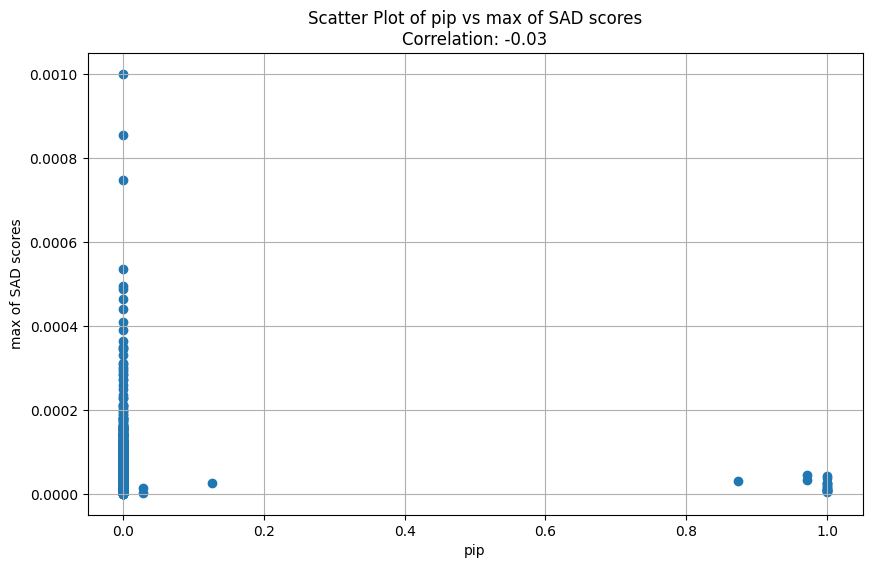

: 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Replace 'x_column' and 'y_column' with the actual column names in your dataframe
x_column = 'pip'
y_column = 'SAD9'
y_column2 = 'SAD1'

maxed = maxed = [max(abs(x[0]), abs(x[1])) for x in zip(locus_with_sads[y_column], locus_with_sads[y_column2])]

# Calculate the correlation coefficient
correlation, _ = pearsonr(locus_with_sads[x_column], maxed)#locus_with_sads[y_column].abs() + locus_with_sads[y_column2].abs())

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(locus_with_sads[x_column], maxed)#locus_with_sads[y_column].abs() + locus_with_sads[y_column2].abs(), alpha=0.7)
plt.title(f'Scatter Plot of {x_column} vs max of SAD scores\nCorrelation: {correlation:.2f}')
plt.xlabel(x_column)
plt.ylabel("max of SAD scores")
plt.grid(True)
plt.show()

In [40]:
len(loci_mapped)

52

In [43]:
pst = 0
for id_snp in loci_mapped:
    locus = loci_mapped[id_snp]
    locus = locus[locus['cs'] > 0]
    pst += len(locus)
print(pst, pst/len(loci_mapped))

801 15.403846153846153


In [44]:
pri = 0
for id_snp in loci_orig_mapped:
    locus = loci_orig_mapped[id_snp]
    locus = locus[locus['cs'] > 0]
    pri += len(locus)
print(pri, pri/len(loci_orig_mapped))

395 13.620689655172415


: 

In [68]:
import pandas as pd
import susie_fine_mapping_utils as fm

loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

In [69]:
loci[0]

(5.0, 61018394.0, 62018394.0, 'rs3872822', 500000.0)

In [70]:
import paintor_utils as pu

for locus in loci:
    pu.reformat_locus(locus[3], locus[4])

In [12]:
int(loci[0][0])

11

In [3]:
loci[0]

(11.0, 88189953.0, 89189953.0, 'rs674437', 500000.0)

In [ ]:
import subprocess
import susie_fine_mapping_utils as fm
import os

loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

for locus in loci:
    subprocess.run(
        [
            "python",
            pu.LD_SCRIPT,
            "--locus",
            f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}",
            "--reference",
            f"/local/home/ssigfstead/GWAS/1KG_genotypes/ALL.chr{int(locus[0])}.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz",
            "--map",
            "/local/home/ssigfstead/GWAS/1KG_genotypes/integrated_call_samples_v3.20130502.ALL.panel",
            "--effect_allele",
            "EA",
            "--alt_allele",
            "NEA",
            "--population",
            "EUR",
            "--Zhead",
            "ZSCORE",
            "--out_name",
            f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}",
            "--position",
            "POS"
        ],
        text=True,
    )
    os.rename(f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}.ld", f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}.processed.ld")

In [72]:
import subprocess
import susie_fine_mapping_utils as fm
import os
import paintor_utils as pu

loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

for locus in loci:
    subprocess.run(
        [
            "python",
            pu.OVERLAP_SCRIPT,
            "--input",
            "/local/home/ssigfstead/GWAS/PAINTOR_annotations/mdd_annotations",
            "--locus",
            f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}.processed",
            "--out",
            f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}.processed.annotations",
            "--chr",
            "CHR",
            "--pos",
            "POS",
        ],
        text=True,
    )

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/FANTOM5/brain_differentially_expressed_enhancers.bed

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.CDS.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.exon.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.gene.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.Selenocysteine.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.start_codon.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.stop_codon.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations/GeneElements_Gencode/GenCode.transcript.hg19

/local/home/ssigfstead/GWAS/PAINTOR_annotations/Functional_Annotations

In [73]:
import subprocess
import susie_fine_mapping_utils as fm
import os
import paintor_utils as pu

loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

with open("/local/home/ssigfstead/GWAS/PAINTOR_inputs/loci.txt", "w") as f:
    for locus in loci:
        f.write(f"locus_{locus[3]}_{locus[4]}.processed\n")

subprocess.run(
    [
        pu.PAINTOR_SCRIPT,
        "-in",
        "/local/home/ssigfstead/GWAS/PAINTOR_inputs/",
        "-input",
        "/local/home/ssigfstead/GWAS/PAINTOR_inputs/loci.txt",
        "-Zhead",
        "ZSCORE",
        "-LDname",
        "ld",
        "-annotations",
        "brain_differentially_expressed_enhancers.bed,"
        "GenCode.CDS.hg19,"
        "GenCode.exon.hg19,"
        "GenCode.gene.hg19,"
        "GenCode.Selenocysteine.hg19,"
        "GenCode.start_codon.hg19,"
        "GenCode.stop_codon.hg19",
        "GenCode.transcript.hg19,"
        "GenCode.UTR.hg19,"
        "fBrain-DS11872.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS11877.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS14464.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS14717.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS14718.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS14803.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS14815.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS15453.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS16302.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS20221.hg19.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS20226.hg19.hotspot.twopass.fdr0.05.merge.bed,"
        "fBrain-DS20231.hg19.hotspot.twopass.fdr0.05.merge.bed,"
        "All.TFBS.bed",
        "-out",
        "/local/home/ssigfstead/GWAS/PAINTOR_outputs",
        "-mcmc",
    ],
    text=True,
)

Running PAINTOR in MCMC mode
Number of chains: 5
Samples per chain: 50000
Burn in: 5000
Proportion of LD variance kept when performing truncated SVD for estimating N*h2g: 0.95
Model annotations: brain_differentially_expressed_enhancers.bed GenCode.CDS.hg19 GenCode.exon.hg19 GenCode.gene.hg19 GenCode.Selenocysteine.hg19 GenCode.start_codon.hg19 GenCode.stop_codon.hg19 
**********
Reading in files for: locus_rs3872822_500000.0.processed
Reading in files for: locus_rs200949_500000.0.processed
Reading in files for: locus_rs4404022_500000.0.processed
Reading in files for: locus_rs4801157_500000.0.processed
Reading in files for: locus_rs138218528_500000.0.processed
Reading in files for: locus_rs7502539_500000.0.processed
Reading in files for: locus_rs215852_500000.0.processed
Reading in files for: locus_rs10752206_500000.0.processed
Reading in files for: locus_rs10765821_500000.0.processed
Reading in files for: locus_rs9262120_500000.0.processed
Reading in files for: locus_rs10512249_500000.

Enrichment estimates at iteration 1 is :
7.71824
      0
      0
      0
      0
      0
      0
      0
Average log bayes factor: 569.88

Enrichment estimates at iteration 2 is :
 6.71815
 17.7089
0.504301
-0.39801
0.137108
       0
 13.5314
 12.9058
Average log bayes factor: 543.922

Enrichment estimates at iteration 3 is :
 6.34729
 17.7089
 1.12673
-0.57141
0.102345
       0
 13.5314
 12.9058
Average log bayes factor: 489.52

Enrichment estimates at iteration 4 is :
  6.14029
  17.7089
  1.39361
-0.393298
0.0329609
        0
  13.5314
  12.9058
Average log bayes factor: 440.727

Enrichment estimates at iteration 5 is :
  5.98393
  17.7089
  1.09668
-0.238965
0.0103021
        0
  13.5314
  12.9058
Average log bayes factor: 381.545

Enrichment estimates at iteration 6 is :
    5.85995
    17.7089
    1.14862
-0.00216829
 -0.0468079
          0
    13.5314
    12.9058
Average log bayes factor: 376.266

Enrichment estimates at iteration 7 is :
  5.81158
  17.7089
  1.26747
 0.085626
-

CompletedProcess(args=['/local/home/ssigfstead/tools/PAINTOR_V3.0/PAINTOR', '-in', '/local/home/ssigfstead/GWAS/PAINTOR_inputs/', '-input', '/local/home/ssigfstead/GWAS/PAINTOR_inputs/loci.txt', '-Zhead', 'ZSCORE', '-LDname', 'ld', '-annotations', 'brain_differentially_expressed_enhancers.bed,GenCode.CDS.hg19,GenCode.exon.hg19,GenCode.gene.hg19,GenCode.Selenocysteine.hg19,GenCode.start_codon.hg19,GenCode.stop_codon.hg19', 'GenCode.transcript.hg19,GenCode.UTR.hg19,fBrain-DS11872.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS11877.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS14464.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS14717.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS14718.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS14803.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS14815.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS15453.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS16302.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS20221.hg19.hotspot.twopass.fdr0.05.merge.bed,fBrain-DS20226.hg19.hotspot.twopass.f

In [1]:
import subprocess
import susie_fine_mapping_utils as fm
import os
import paintor_utils as pu
import pandas as pd

loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.5.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /usr/lib/R
INFO:rpy2.situation:R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.situation:LD_LIBRARY_PATH: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [2]:
locus = loci[4]

In [3]:
sads = pd.read_csv("/local/home/ssigfstead/GWAS/1000_genomes_csv_tsv_match/combined_result_sorted.csv")

In [5]:
sads = sads.drop_duplicates(subset=["snp"])

In [6]:
results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus[3]}_{locus[4]}.processed.results", sep=" ")
sads_df = pd.merge(results_df, sads, left_on="rsID", right_on="snp", how='inner', validate='one_to_one', )
#calculate 95% credible set
# results_df = results_df.sort_values("Posterior_Prob", ascending=False)
# results_df["cumsum"] = results_df["Posterior_Prob"].cumsum()
# credible_set = results_df[results_df["cumsum"] <= 0.95]


In [7]:
sads_df

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,...,pos,ref,snp,beta,standard_error,effect_allele_frequency,p_value,average_SAD,abs_average_SAD,ranking
0,7:117036505:T:C,rs77831922,7,117036505,C,T,0.893932,0.008478,0.004519,0.060659,...,117036505.0,T,rs77831922,0.008478,0.004519,0.893932,0.060659,0.000004,0.000004,21892807
1,7:117040117:A:G,rs2188554,7,117040117,G,A,0.888101,-0.001726,0.003191,0.588729,...,117040117.0,A,rs2188554,-0.001726,0.003191,0.888101,0.588729,0.000067,0.000067,3977358
2,7:117041069:C:T,rs7805063,7,117041069,T,C,0.891128,0.002302,0.002543,0.365423,...,117041069.0,C,rs7805063,0.002302,0.002543,0.891128,0.365423,-0.000002,0.000002,24490846
3,7:117041941:G:A,rs73480763,7,117041941,A,G,0.890759,0.003134,0.004508,0.486988,...,117041941.0,G,rs73480763,0.003134,0.004508,0.890759,0.486988,-0.000010,0.000010,16596278
4,7:117044221:G:T,rs4730781,7,117044221,T,G,0.106454,0.004764,0.003649,0.191645,...,117044221.0,T,rs4730781,-0.004764,0.003649,0.893546,0.191645,-0.000036,0.000036,7131140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,7:118032952:A:C,rs7809552,7,118032952,C,A,0.107217,0.007254,0.002489,0.003564,...,118032952.0,C,rs7809552,-0.007254,0.002489,0.892783,0.003564,-0.000009,0.000009,16675970
1521,7:118033164:C:T,rs76404389,7,118033164,T,C,0.893809,-0.005996,0.005471,0.273077,...,118033164.0,C,rs76404389,-0.005996,0.005471,0.893809,0.273077,-0.000003,0.000003,23187037
1522,7:118033367:A:G,rs112917343,7,118033367,G,A,0.893739,-0.005956,0.005470,0.276232,...,118033367.0,A,rs112917343,-0.005956,0.005470,0.893739,0.276232,-0.000008,0.000008,18059612
1523,7:118033790:A:G,rs6954272,7,118033790,G,A,0.106893,0.007368,0.002488,0.003066,...,118033790.0,G,rs6954272,-0.007368,0.002488,0.893107,0.003066,-0.000023,0.000023,10147430


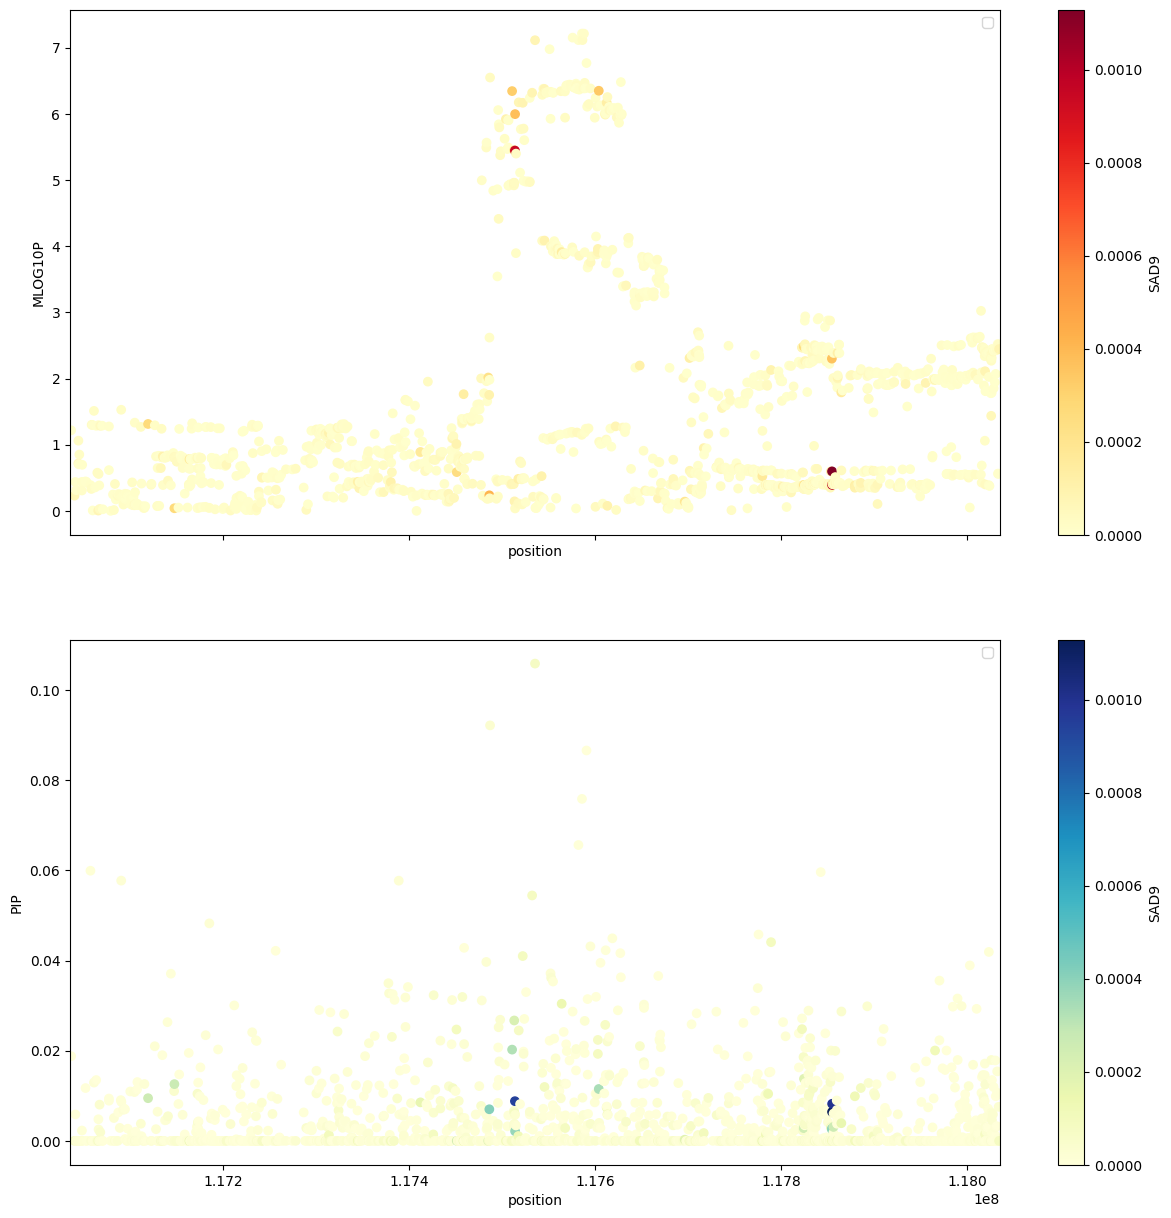

In [11]:

import matplotlib.pyplot as plt
mapped_locus_df = sads_df

# ld = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}.processed.ld", sep=" ", header=None)

import numpy as np
fig ,axes = plt.subplots(nrows=2,sharex=True,figsize=(15,15),height_ratios=(1,1))
df = mapped_locus_df.copy(deep=True)
df["MLOG10P"] = -np.log10(df["P"])
col_to_plot = "MLOG10P"
p=axes[0].scatter(df["POS"],df[col_to_plot],c=df["SAD9"].abs(), cmap="YlOrRd")

# axes[0].scatter(df.loc[df["cumsum"] <= 0.95,"POS"],df.loc[df["cumsum"] <= 0.95,col_to_plot],
#         marker='o',s=40,c="None",edgecolors='red',label="Variants in credible sets")

plt.colorbar( p , label="SAD9")
axes[0].set_xlabel("position")
axes[0].set_xlim((locus[1], locus[2]))
axes[0].set_ylabel(col_to_plot)
axes[0].legend()

p=axes[1].scatter(df["POS"],df["Posterior_Prob"],c=df["SAD9"].abs(), cmap="YlGnBu")

# axes[1].scatter(df.loc[df["cumsum"] <= 0.95,"POS"],df.loc[df["cumsum"] <= 0.95,"Posterior_Prob"],
#         marker='o',s=40,c="None",edgecolors='red',label="Variants in credible sets")

plt.colorbar( p , label="SAD9")
axes[1].set_xlabel("position")
axes[1].set_xlim((locus[1], locus[2]))
axes[1].set_ylabel("PIP")
axes[1].legend()

plt.show()

In [25]:
our_loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.5.csv", chr_col="chr", pos_col="pos", rsid_col="snp")
orig_loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

In [26]:
locus = our_loci[0]

In [27]:
results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus[3]}_{locus[4]}.processed.results", sep=" ")

In [28]:
results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_rs674437_500000.0.processed.results", sep=" ")

In [29]:
sads = pd.read_csv("/local/home/ssigfstead/GWAS/1000_genomes_csv_tsv_match/combined_result_sorted.csv")

In [33]:
highest_probs.append(results_df["Posterior_Prob"].max())
lead_probs.append(results_df.loc[results_df["P"].idxmin()]["Posterior_Prob"])
all_probs.extend(results_df["Posterior_Prob"].values)
sads_df = pd.merge(results_df, sads, left_on="rsID", right_on="snp", how='inner', validate='one_to_one')

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [30]:
from tqdm import tqdm

lead_probs = []
highest_probs = []
all_probs = []
all_sad1 = []
all_sad9 = []
all_probs_in_sad = []
sads_dfs = []
for locus in tqdm(our_loci):
    results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus[3]}_{locus[4]}.processed.results", sep=" ")
    highest_probs.append(results_df["Posterior_Prob"].max())
    lead_probs.append(results_df.loc[results_df["P"].idxmin()]["Posterior_Prob"])
    all_probs.extend(results_df["Posterior_Prob"].values)
    sads_df = pd.merge(results_df, sads, left_on="rsID", right_on="snp", how='inner', validate='one_to_one')
    sads_dfs.append(sads_df)

  0%|          | 0/52 [00:55<?, ?it/s]


MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

In [31]:
len(all_probs_in_sad)

0

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Calculate the correlation coefficient
correlation, _ = pearsonr(sads_df["Posterior_Prob"], sads_df["SAD1"].abs())

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sads_df["Posterior_Prob"],  sads_df["SAD1"].abs(), alpha=0.7)
plt.title(f'Scatter Plot of PIP vs SAD9\nCorrelation: {correlation:.2f}')
plt.xlabel("PIP")
plt.ylabel("SAD9")
plt.grid(True)
plt.show()

NameError: name 'sads_df' is not defined

In [162]:
print(sum(lead_probs)/len(lead_probs), sum(highest_probs)/len(highest_probs), sum(all_probs)/len(all_probs))

0.11143861538461541 0.303461923076923 0.005086988791644877


In [34]:
lead_probs = []
highest_probs = []
all_probs = []
all_sad1 = []
all_sad9 = []
all_probs_in_sad = []
for locus in tqdm(orig_loci):
    results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus[3]}_{locus[4]}.processed.results", sep=" ")
    highest_probs.append(results_df["Posterior_Prob"].max())
    lead_probs.append(results_df.loc[results_df["P"].idxmin()]["Posterior_Prob"])
    all_probs.extend(results_df["Posterior_Prob"].values)
    all_sad1.extend(sads[sads["snp"].isin(results_df["rsID"])]["SAD1"].values)
    all_sad9.extend(sads[sads["snp"].isin(results_df["rsID"])]["SAD9"].values)
    all_probs_in_sad.extend(results_df[results_df["rsID"].isin(sads["snp"])]["Posterior_Prob"].values)

100%|██████████| 29/29 [02:41<00:00,  5.58s/it]


In [35]:
list(zip(all_sad1, all_sad9))

[(-0.000502, -0.00069),
 (-0.0003414, -0.0002842),
 (-0.0003042, -0.0002966),
 (-0.000366, -0.0002314),
 (0.0002818, 0.0001945),
 (-0.0002136, -0.0002544),
 (0.0002165, 0.000236),
 (0.0002245, 0.000213),
 (-0.0001891, -0.0002278),
 (-0.0002073, -0.0001795),
 (-0.0001956, -0.0001909),
 (-0.0001742, -0.0002064),
 (0.0001501, 0.0002236),
 (0.0002143, 0.0001578),
 (-0.0001924, -0.0001773),
 (0.0002043, 0.0001603),
 (0.0001621, 0.0001887),
 (0.0001631, 0.0001854),
 (-0.00010884, -0.0002086),
 (0.0001597, 0.0001483),
 (-0.0001017, -0.000206),
 (0.0001564, 0.0001339),
 (0.0002666, 2.146e-05),
 (-0.0001285, -0.0001574),
 (-0.000292, 1.06e-05),
 (-0.0001234, -0.0001572),
 (-0.000183, -9.364e-05),
 (-0.0001079, -0.000167),
 (0.000119, 0.0001544),
 (-0.0001439, -0.0001293),
 (-8.39e-05, -0.0001696),
 (0.00011027, 0.0001429),
 (0.0001452, 0.00010777),
 (-9.92e-05, -0.0001311),
 (0.0001019, 0.0001245),
 (-6.056e-05, -0.0001643),
 (-0.0001049, -0.00011176),
 (0.00011396, 9.73e-05),
 (-0.00011075, -0

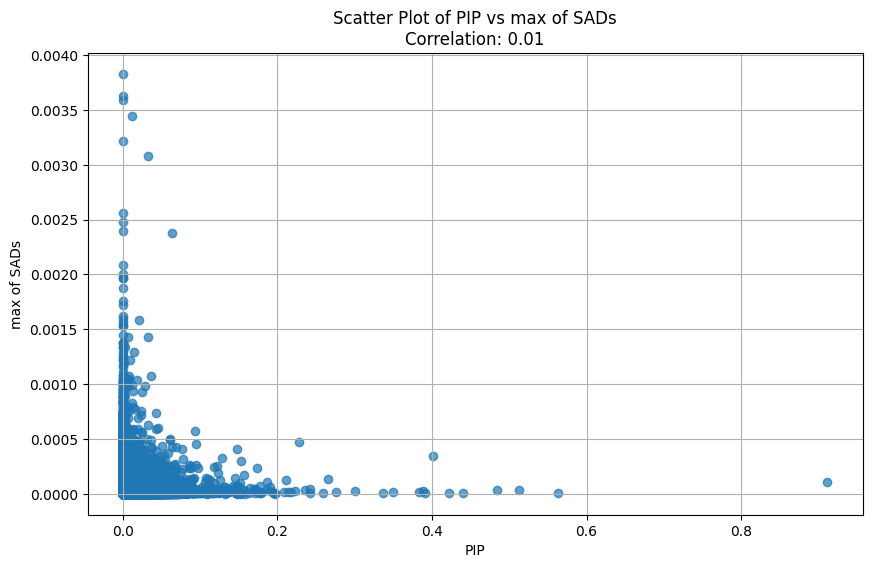

In [39]:
# Calculate the correlation coefficient
from functools import reduce

summed = [abs(x[0]) + abs(x[1]) for x in zip(all_sad1, all_sad9)]
maxed = [max(abs(x[0]), abs(x[1])) for x in zip(all_sad1, all_sad9)]

correlation, _ = pearsonr(all_probs_in_sad, list(map(abs, maxed)))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(all_probs_in_sad,  list(map(abs, maxed)), alpha=0.7)
plt.title(f'Scatter Plot of PIP vs max of SADs\nCorrelation: {correlation:.2f}')
plt.xlabel("PIP")
plt.ylabel("max of SADs")
plt.grid(True)
plt.show()

In [164]:
print(sum(lead_probs)/len(lead_probs), sum(highest_probs)/len(highest_probs), sum(all_probs)/len(all_probs))

0.13443255172413796 0.2739108965517241 0.004752667453372376


In [1]:

import matplotlib.pyplot as plt
results_df["Posterior_Prob"].max()
mapped_locus_df = results_df

ld = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_inputs/locus_{locus[3]}_{locus[4]}.processed.ld", sep=" ", header=None)
sad1 = sads[sads["snp"].isin(mapped_locus_df["rsID"])]["SAD1"]

import numpy as np
fig ,axes = plt.subplots(nrows=2,sharex=True,figsize=(15,15),height_ratios=(1,1))
df = mapped_locus_df.copy(deep=True)
df["MLOG10P"] = -np.log10(df["P"])
col_to_plot = "MLOG10P"
p=axes[0].scatter(df["POS"],df[col_to_plot],c=ld[df["P"].idxmin()]**2)

# axes[0].scatter(df.loc[df["cumsum"] <= 0.95,"POS"],df.loc[df["cumsum"] <= 0.95,col_to_plot],
#         marker='o',s=40,c="None",edgecolors='red',label="Variants in credible sets")

plt.colorbar( p , label="Rsq with the lead variant")
axes[0].set_xlabel("position")
axes[0].set_xlim((locus[1], locus[2]))
axes[0].set_ylabel(col_to_plot)
axes[0].legend()

p=axes[1].scatter(df["POS"],df["Posterior_Prob"],c=df["BETA"].abs(), cmap="YlOrRd")

# axes[1].scatter(df.loc[df["cumsum"] <= 0.95,"POS"],df.loc[df["cumsum"] <= 0.95,"Posterior_Prob"],
#         marker='o',s=40,c="None",edgecolors='red',label="Variants in credible sets")

plt.colorbar( p , label="|BETA|")
axes[1].set_xlabel("position")
axes[1].set_xlim((locus[1], locus[2]))
axes[1].set_ylabel("PIP")
axes[1].legend()

plt.show()

NameError: name 'results_df' is not defined

In [2]:
import subprocess
import susie_fine_mapping_utils as fm
import os
import paintor_utils as pu
import pandas as pd

our_loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.5.csv", chr_col="chr", pos_col="pos", rsid_col="snp")
orig_loci = fm.get_loci("/local/home/ssigfstead/GWAS/filtered_snps_threshold=0.0.csv", chr_col="chr", pos_col="pos", rsid_col="snp")

common_loci_indices = set([locus[3] for locus in our_loci]).intersection(set([locus[3] for locus in orig_loci]))
our_loci_indices = set([locus[3] for locus in our_loci]).difference(set([locus[3] for locus in orig_loci]))
discarded_loci_indices = set([locus[3] for locus in orig_loci]).difference(set([locus[3] for locus in our_loci]))

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /usr/lib/R
INFO:rpy2.situation:R library path: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.situation:LD_LIBRARY_PATH: /usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [5]:
len(our_loci_indices), len(common_loci_indices), len(discarded_loci_indices)

(47, 5, 24)

In [14]:
our_loci_lead_probs = []
our_loci_highest_probs = []
our_n_above_1 = []
for locus_index in our_loci_indices:
    results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus_index}_500000.0.processed.results", sep=" ")
    our_loci_lead_probs.append(results_df.loc[results_df["P"].idxmin()]["Posterior_Prob"])
    our_loci_highest_probs.append(results_df["Posterior_Prob"].max())
    our_n_above_1.append(len(results_df[results_df["Posterior_Prob"] > 0.01]))

In [16]:
common_loci_lead_probs = []
common_loci_highest_probs = []
common_n_above_1 = []
for locus_index in common_loci_indices:
    results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus_index}_500000.0.processed.results", sep=" ")
    common_loci_lead_probs.append(results_df.loc[results_df["P"].idxmin()]["Posterior_Prob"])
    common_loci_highest_probs.append(results_df["Posterior_Prob"].max())
    common_n_above_1.append(len(results_df[results_df["Posterior_Prob"] > 0.01]))

In [17]:
orig_loci_lead_probs = []
orig_loci_highest_probs = []
orig_n_above_1 = []
for locus_index in discarded_loci_indices:
    results_df = pd.read_csv(f"/local/home/ssigfstead/GWAS/PAINTOR_outputs/locus_{locus_index}_500000.0.processed.results", sep=" ")
    orig_loci_lead_probs.append(results_df.loc[results_df["P"].idxmin()]["Posterior_Prob"])
    orig_loci_highest_probs.append(results_df["Posterior_Prob"].max())
    orig_n_above_1.append(len(results_df[results_df["Posterior_Prob"] > 0.01]))

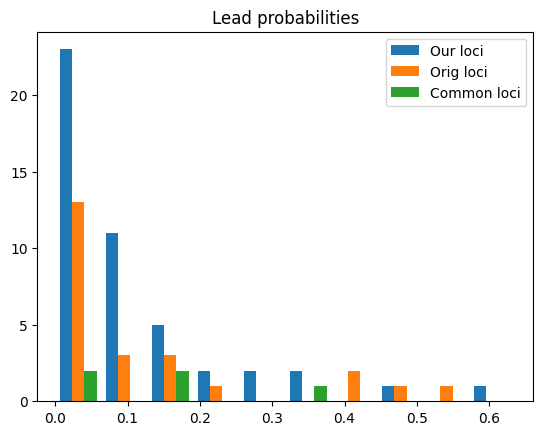

In [22]:
import matplotlib.pyplot as plt
plt.hist([our_loci_lead_probs, orig_loci_lead_probs, common_loci_lead_probs], bins=10, label=["Our loci", "Orig loci", "Common loci"])
plt.legend()
plt.title("Lead probabilities")
plt.show()

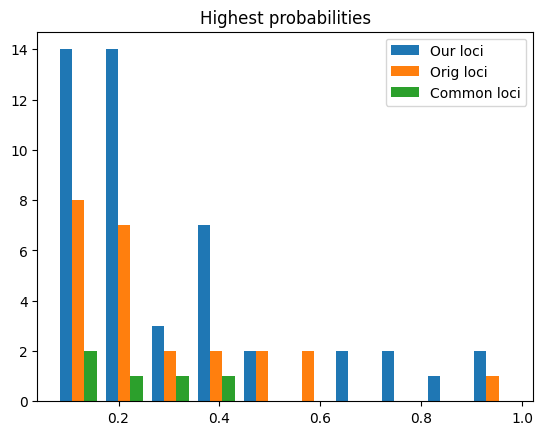

In [21]:
plt.hist([our_loci_highest_probs, orig_loci_highest_probs, common_loci_highest_probs], bins=10, label=["Our loci", "Orig loci", "Common loci"])
plt.legend()
plt.title("Highest probabilities")
plt.show()

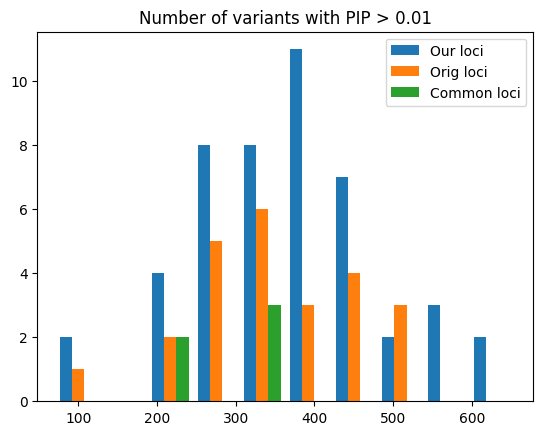

In [20]:
plt.hist([our_n_above_1, orig_n_above_1, common_n_above_1], bins=10, label=["Our loci", "Orig loci", "Common loci"])
plt.legend()
plt.title("Number of variants with PIP > 0.01")
plt.show()